In [32]:
from pandas import read_sql_query
from pandas import DataFrame
import sqlite3
import matplotlib.pyplot as plt
from seaborn import heatmap 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
#funcoes uteis
# adapted of : 
# https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def plt_confusion_matrix(confusion_matrix,class_names, figsize = (10,7), fontsize=14):
    df_cm = DataFrame(
            confusion_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap_ = heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap_.yaxis.set_ticklabels(heatmap_.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap_.xaxis.set_ticklabels(heatmap_.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
alltable = lambda x: 'select * from {x}'.format(x=x)

In [34]:
conn = sqlite3.connect('../data/db.db')
cursor = conn.cursor()
df = read_sql_query(alltable("credit_data"), con=conn)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df[['income', 'age', 'loan']],
                                                   df['default'],
                                                   test_size=0.1,
                                                   random_state=0)

In [36]:
naive_classifier = GaussianNB()
naive_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
predictions = naive_classifier.predict(X_test)

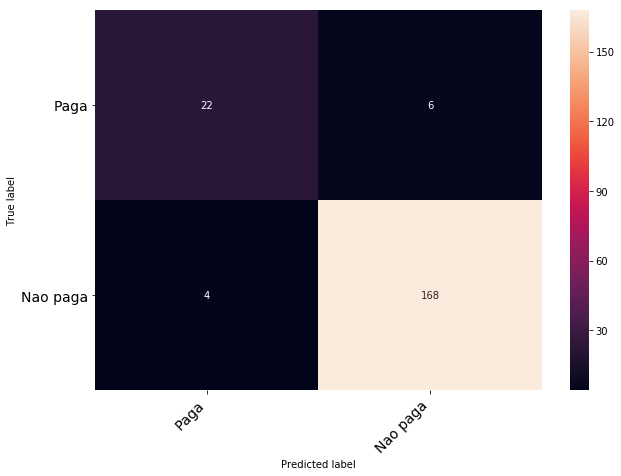

In [38]:
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
plt_confusion_matrix(cnf_matrix, class_names=['Paga', 'Nao paga'])

In [39]:
accuracy_score(y_test, predictions)

0.95